<table width=100%>
    <tr>
        <td width = 40% align = "left">
            <h3> MTH786 Machine Learning with Python</h3>
        </td>
        <td width = 35%>            
        </td>
        <td width = 25% align = "left">
            <h3>Semester A </h3>
        </td>
    </tr>
    <tr>
        <td width = 40% align = "left">
            <h3> Lab Coursework 4</h3>
        </td>
        <td width = 35%>            
        </td>
        <td width = 25% align = "left">
            <h3>Dr Nicola Perra </h3>
        </td>
    </tr>
</table>

We start by loading necessary libraries, including NumPy (used for linear algebra calculations) and MatPlotLib (used for visualisation).

In [76]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Linear regression
By completing this exercise you will write a set of functions that are used for building a linear regression for a given data samples. You will then finish by calculating a linear regression for a height-weight dataset. 


1. Implement function **linear_regression_data** that computes (and outputs) the linear regression data matrix defined as
$$
\mathbf{X} = 
\begin{pmatrix}
1 & x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_d \\
1 & x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_d \\
\vdots & \vdots & \vdots & \ddots & \vdots & \\
1 & x^{(s)}_1 & x^{(s)}_2 & \ldots & x^{(s)}_d \\
\end{pmatrix}
$$
The function **linear_regression_data**  should take the NumPy array *data_inputs* as argument. Here, *data_inputs* is supposed to be a data matrix containing all inputs in the matrix form as follows
$$
data\_inputs = 
\begin{pmatrix}
x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_d \\
x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_d \\
\vdots & \vdots & \ddots & \vdots & \\
x^{(s)}_1 & x^{(s)}_2 & \ldots & x^{(s)}_d \\
\end{pmatrix}.
$$
The function should output data matrix $\mathbf{X}$.

In [77]:
def linear_regression_data(data_inputs):
    ones_col = np.ones(len(data_inputs))
    data_matrix = np.c_[ones_col, data_inputs] # note np.c_ used square brackets
    return data_matrix

Test your function with the following unit tests

In [78]:
from numpy.testing import assert_array_almost_equal, assert_array_equal
test_inputs = np.array([[1], [2], [3], [4]])
assert_array_equal(linear_regression_data(test_inputs), np.array([[1, 1], [1, 2], [1, 3], [1, 4]]))

In [79]:
test_inputs = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
assert_array_equal(linear_regression_data(test_inputs), np.array([[1, 1, 2], [1, 2, 3], [1, 3, 4], [1, 4, 5]]))

Try your function with this random samples

In [80]:
samples, dimensions = np.random.randint(low = 2, high = 100,size = 2) # select 2 integers randomly in [2, 100]
test_inputs = np.random.rand(samples, dimensions)

print (samples,dimensions)
print (test_inputs)

87 44
[[0.92038792 0.12968749 0.72616793 ... 0.95618108 0.19925833 0.56601502]
 [0.27668502 0.66323145 0.51329274 ... 0.89961111 0.87172376 0.55880144]
 [0.83963272 0.91454202 0.0605818  ... 0.19600093 0.73179564 0.90261834]
 ...
 [0.50270154 0.5810496  0.18905637 ... 0.32908999 0.0315161  0.4760055 ]
 [0.23813427 0.01029711 0.14179916 ... 0.89872523 0.89450653 0.82905254]
 [0.83797087 0.87641566 0.61657119 ... 0.83342211 0.59078079 0.33930801]]


2. Write a function **linear_regression** that takes two arguments *data_matrix* and *data_outputs*, which computes and returns the solution $\hat{\mathbf{W}}$ of the normal equation
$$
\mathbf{X}^{\top}\mathbf{X} \hat{\mathbf{W}} = \mathbf{X}^{\top}\mathbf{Y}
$$
Here $\mathbf{X}$  is the mathematical representation of *data_matrix*
and $\mathbf{Y}$ is the mathematical representation of *data_outputs*, while $\hat{\mathbf{W}}$ is a mathematical representation for weights/coefficients of the linear regression.

**Hint**: you the function np.linalg.solve
https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html

In [81]:
def linear_regression(data_matrix, data_outputs):
    # np.linalg.solve(A, b) -> returns x s.t Ax = b
    return np.linalg.solve(data_matrix.T @ data_matrix, data_matrix.T @ data_outputs)

Test your function with the following unit tests

In [82]:
test_data_matrix = np.array([[1,0.5],[1,1.5]])
test_outputs = np.array([[1],[1]])
assert_array_almost_equal(linear_regression(test_data_matrix, test_outputs), np.array([[1], [0]]))

In [83]:
test_data_matrix = np.array([[1,0.98],[1,1.02]])
test_outputs = np.array([[-0.1],[0.3]])
assert_array_almost_equal(linear_regression(test_data_matrix, test_outputs), np.array([[-9.9], [10]]))

Try your code with this random data

In [84]:
samples, dimensions, output_dimensions = np.random.randint(low = 2, high = 100,size = 3)
test_inputs = np.random.rand(samples, dimensions)
test_outputs = np.random.rand(samples, output_dimensions)

print (samples, dimensions, output_dimensions)
print (test_inputs)
print ('--')
print (test_outputs)

77 51 91
[[0.21613474 0.27463996 0.32977199 ... 0.86505816 0.19065597 0.0063922 ]
 [0.39119435 0.71622526 0.50384922 ... 0.92673625 0.63020373 0.74297464]
 [0.76654035 0.92684566 0.29428759 ... 0.7436263  0.99612445 0.68930543]
 ...
 [0.08119164 0.77472998 0.92233602 ... 0.81333685 0.24517056 0.88297134]
 [0.61182258 0.22188048 0.79055402 ... 0.73904612 0.12784357 0.85121967]
 [0.44008749 0.92599294 0.39381933 ... 0.70144144 0.12107033 0.68422605]]
--
[[0.19259367 0.6822647  0.54312785 ... 0.93209955 0.53205669 0.32217923]
 [0.59793201 0.23511711 0.79980564 ... 0.10022096 0.16496057 0.50495913]
 [0.51379987 0.66582017 0.48909039 ... 0.15989673 0.60216417 0.46640823]
 ...
 [0.44015992 0.63808968 0.75609807 ... 0.06230245 0.6409861  0.78734464]
 [0.50519562 0.29777172 0.0692482  ... 0.97598537 0.3082959  0.64046002]
 [0.03647266 0.9251083  0.67090356 ... 0.30546442 0.35711794 0.04926434]]


3. Write a function **prediction_error** that evaluates a mean-squared error over the set of data inputs and outputs. The function **prediction_error** takes the arguments _data_matrix_, _data_ouputs_ and _weights_ as inputs and returns a mean squared error defined by
$$
\mathrm{MSE} = \frac{1}{2s} \left\|\mathbf{X}\mathbf{W} - \mathbf{Y} \right\|^2,
$$
where $\mathbf{X}$ is a mathematical representation of _data_matrix_, $\mathbf{Y}$ is a mathematical representation of _data_outputs_ and $\mathbf{W}$ is a mathematical representation of _weights_.

In [85]:
def prediction_error(data_matrix,data_outputs,weights):
    s = len(data_matrix)
    inside = data_matrix@weights - data_outputs
    return (np.linalg.norm(inside)**2) / (2*s)


Test your function with the following unit tests

In [86]:
test_data_matrix = np.array([[1,0.98],[1,1.02]])
test_data_outputs = np.array([[-0.1],[0.3]])
test_weights = np.array([[-9.9],[10]])
assert_array_almost_equal(prediction_error(test_data_matrix, test_data_outputs, test_weights), 0)

In [87]:
test_data_matrix = np.array([[1,1,-1],[1,2,2]])
test_data_outputs = np.array([[-1,2],[1,3]])
test_weights = np.array([[0,0],[1,2],[3,4]])
assert_array_almost_equal(prediction_error(test_data_matrix, test_data_outputs, test_weights), 36.75)

4. In the next two parts we apply the above to height-weight-gender data, considered in the lectures. Our goal is to build a linear regression for a weight as a function of height or height and gender. We start by reading the data from attached .csv file.   **Important:** please check that the file *height_weight_genders.csv* is located in the same folder with your Jupyter notebook.

In [88]:
converter_function=lambda x: 0 if "Male" in x else 1

genders = np.genfromtxt("height_weight_genders.csv", delimiter=",", skip_header=1, usecols=[0], \
                        converters={0:converter_function})
    # the number used in converters always matches the column index in the csv. So if we used a converter on
    # heights, below, where we only selected the heights col, then it'd be {1:height_conv}.
heights = np.genfromtxt("height_weight_genders.csv", delimiter=",", skip_header=1, usecols=[1])
weights = np.genfromtxt("height_weight_genders.csv", delimiter=",", skip_header=1, usecols=[2])

print (genders)
print (heights)
print (weights)

[0 0 0 ... 1 1 1]
[73.84701702 68.78190405 74.11010539 ... 63.86799221 69.03424313
 61.94424588]
[241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268]


Let us first build a scatter plot of weight-height data (excluding gender).

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

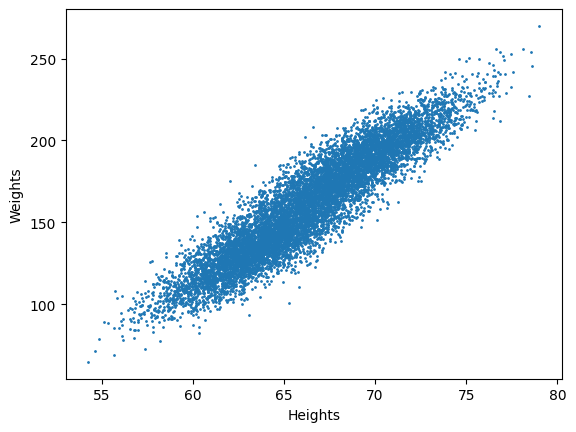

In [89]:
plt.scatter(heights, weights, s=1)
plt.xlabel("Heights")
plt.ylabel("Weights")
plt.tight_layout

In the next cell you use the functions defined above to find optimal regression weights. You then asked to evaluate your training error and plot a linear regression together with the scatter plot above.

In [90]:
data_matrix = linear_regression_data(heights)
regression_weights = linear_regression(data_matrix, weights)

Test your results with the following unit tests

In [91]:
assert_array_almost_equal(regression_weights,np.array([-350.737192, 7.717288]))

Print the prediction error below

In [92]:
error = prediction_error(data_matrix, weights, regression_weights)
print(f"Error: {error}")

Error: 74.6467419745648


In [93]:
print(f"Regression Weights: {regression_weights}")

Regression Weights: [-350.73719181    7.71728764]


Add a plot of linear regression (in red color) to the above scatter plot.

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

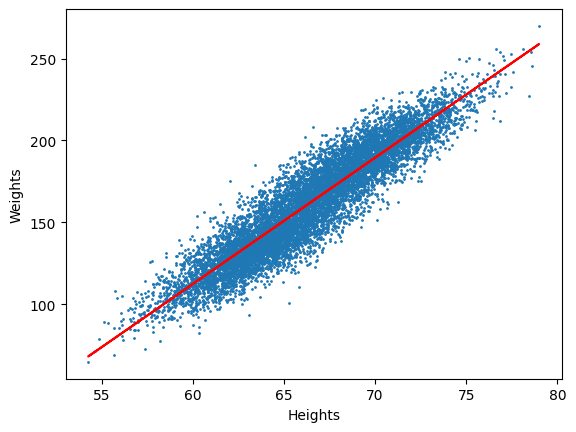

In [94]:
"""
Adding linear regression line:
- Want a line on plot of slope given by optimal weights.
- What we do: consider y_predict = data_matrix @ optimal_weights -> vector of predicted weights.
- plot height against y_predict.
- Making sense of plot:
    - the red line visually looks like a continuous solid line with slope as required
    - but it really is thousands of line segments, since we've plotted from discrete set against discrete set.
    - the overall slope is as required because of the nature of y_predict.
    - so, suppose for new height that's not in the original heights list, there will be a line segment of
        which it is contained in.
"""

y_predict = data_matrix @ regression_weights

plt.scatter(heights, weights, s=1)
plt.plot(heights, y_predict, c="red")
plt.xlabel("Heights")
plt.ylabel("Weights")
plt.tight_layout

6. In this part we include gender parameter to our linear regression. This means that now you are predicting a weight of the person by using his/her height and gender data. As before we start with the scatter plot, which is now a 3D one.

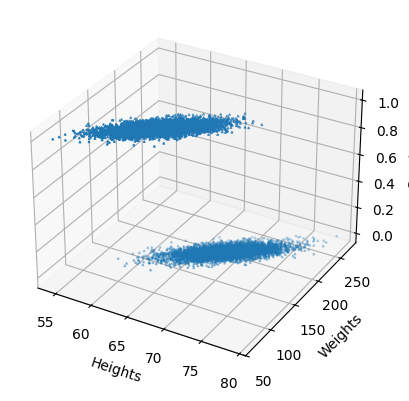

In [95]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(heights, weights, genders, marker='^', s=1)
ax.set_xlabel("Heights")
ax.set_ylabel("Weights")
ax.set_zlabel("Genders")
plt.tight_layout
plt.show()

In the next cell you use the functions defined above to find optimal regression weights. You then asked to evaluate your training error and plot a linear regression together with the scatter plot above.

In [96]:
data_input = np.c_[heights, genders]
data_matrix = linear_regression_data(data_input)
regression_weights = linear_regression(data_matrix, weights)


Test your function with the following unit tests

In [97]:
assert_array_almost_equal(regression_weights,np.array([-225.545792,    5.976941,  -19.377711]))

What is the prediction error?

In [99]:
error = prediction_error(data_matrix, weights, regression_weights)
print(error)

50.12596268768962
